In [28]:
house_train <- read.csv("train.csv")
house_test <- read.csv("test.csv")

In [29]:
head(house_train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
1,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [30]:
head(house_test)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,⋯,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
2,1462,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,⋯,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
3,1463,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,⋯,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
4,1464,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,⋯,0,0,NA,NA,NA,0,6,2010,WD,Normal
5,1465,120,RL,43,5005,Pave,NA,IR1,HLS,AllPub,⋯,144,0,NA,NA,NA,0,1,2010,WD,Normal
6,1466,60,RL,75,10000,Pave,NA,IR1,Lvl,AllPub,⋯,0,0,NA,NA,NA,0,4,2010,WD,Normal


In [23]:
install.packages("textir")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
install.packages("ggthemes")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [15]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [17]:
install.packages("gridExtra")
install.packages("GGally")
install.packages("e1071")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’, ‘reshape’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




In [18]:
library(textir) ## needed to standardize the data
library(class) ## needed for knn
library(ggplot2) # visualization
library(ggthemes) # visualization
library(scales) # visualization
library(dplyr) # data manipulation
library(randomForest) # random forest
library(corrplot) # correlation
library(gridExtra)
library(GGally)
library(e1071)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:randomForest’:

    combine


The following object is masked from ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [32]:
# Check missing values . Identify the columns which have missing values 
mvc = 0
for (i in 1:ncol(house_train))
{
  m = sum(is.na(house_train[,i]))
  if(m!=0){
    print(paste("Column ",colnames(house_train[i])," has ",m," missing values"))
  }
  if(m>0){
    mvc = mvc+1
  }
  else{
    mvc
    }
}  




[1] "Column  LotFrontage  has  259  missing values"
[1] "Column  Alley  has  1369  missing values"
[1] "Column  MasVnrType  has  8  missing values"
[1] "Column  MasVnrArea  has  8  missing values"
[1] "Column  BsmtQual  has  37  missing values"
[1] "Column  BsmtCond  has  37  missing values"
[1] "Column  BsmtExposure  has  38  missing values"
[1] "Column  BsmtFinType1  has  37  missing values"
[1] "Column  BsmtFinType2  has  38  missing values"
[1] "Column  Electrical  has  1  missing values"
[1] "Column  FireplaceQu  has  690  missing values"
[1] "Column  GarageType  has  81  missing values"
[1] "Column  GarageYrBlt  has  81  missing values"
[1] "Column  GarageFinish  has  81  missing values"
[1] "Column  GarageQual  has  81  missing values"
[1] "Column  GarageCond  has  81  missing values"
[1] "Column  PoolQC  has  1453  missing values"
[1] "Column  Fence  has  1179  missing values"
[1] "Column  MiscFeature  has  1406  missing values"


19 columns have non-zero missing values

In [35]:
# Check relationship between LotFrontage and LotArea
# Assigned LotFrontage values as 500 to the missing value in order to plot the relationship of all the LotFrontage
# including the missing values with price
house_train$LotFrontage[is.na(house_train$LotFrontage)] <- 500

In [37]:
# Assign missing values of LotFrontage to 96 as missing values have same median with LotFrontage ranging from 90 t0 100
house_train$LotFrontage[house_train$LotFrontage == 500] <- 96

# Alley access with NA means no alley access. So we need to replace it with empty or blank value
house_train$Alley <- as.character(house_train$Alley)
house_train$Alley[is.na(house_train$Alley)] <- 'No alley access'
house_train$Alley <- factor(house_train$Alley)
str(house_train$Alley)

 Factor w/ 3 levels "Grvl","No alley access",..: 2 2 2 2 2 2 2 2 2 2 ...


In [38]:
# Missing value for MasVnrType, MasVnrArea and Electrical
# Since only 9 rows altoghether are missing we can omit them from the dataset
house_train <- house_train[!is.na(house_train$MasVnrType),]
house_train <- house_train[!is.na(house_train$Electrical),]

# Missing value for houses without basement 
house_train$BsmtQual <- as.character(house_train$BsmtQual)
house_train$BsmtQual[is.na(house_train$BsmtQual)] <- 'No Basement'
house_train$BsmtQual <- factor(house_train$BsmtQual)

house_train$BsmtCond <- as.character(house_train$BsmtCond)
house_train$BsmtCond[is.na(house_train$BsmtCond)] <- 'No Basement'
house_train$BsmtCond <- factor(house_train$BsmtCond)


house_train$BsmtExposure <- as.character(house_train$BsmtExposure)
house_train$BsmtExposure[is.na(house_train$BsmtExposure)] <- 'No Basement'
house_train$BsmtExposure <- factor(house_train$BsmtExposure)

In [39]:
house_train$BsmtFinType1 <- as.character(house_train$BsmtFinType1)
house_train$BsmtFinType1[is.na(house_train$BsmtFinType1)] <- 'No Basement'
house_train$BsmtFinType1 <- factor(house_train$BsmtFinType1)


house_train$BsmtFinType2 <- as.character(house_train$BsmtFinType2)
house_train$BsmtFinType2[is.na(house_train$BsmtFinType2)] <- 'No Basement'
house_train$BsmtFinType2 <- factor(house_train$BsmtFinType2)

# Missing value for fire  place
house_train$FireplaceQu <- as.character(house_train$FireplaceQu)
house_train$FireplaceQu[is.na(house_train$FireplaceQu)] <- 'No Fireplace'
house_train$FireplaceQu <- factor(house_train$FireplaceQu)

# Missing value for garage  
house_train$GarageType <- as.character(house_train$GarageType)
house_train$GarageType[is.na(house_train$GarageType)] <- 'No Garage'
house_train$GarageType <- factor(house_train$GarageType)


house_train$GarageYrBlt[is.na(house_train$GarageYrBlt)] <- 0

In [40]:
house_train$GarageFinish <- as.character(house_train$GarageFinish)
house_train$GarageFinish[is.na(house_train$GarageFinish)] <- 'No Garage'
house_train$GarageFinish <- factor(house_train$GarageFinish)


house_train$GarageQual <- as.character(house_train$GarageQual)
house_train$GarageQual[is.na(house_train$GarageQual)] <- 'No Garage'
house_train$GarageQual <- factor(house_train$GarageQual)


house_train$GarageCond <- as.character(house_train$GarageCond)
house_train$GarageCond[is.na(house_train$GarageCond)] <- 'No Garage'
house_train$GarageCond <- factor(house_train$GarageCond)


# Missing value for pool  
house_train$PoolQC <- as.character(house_train$PoolQC)
house_train$PoolQC[is.na(house_train$PoolQC)] <- 'No Pool'
house_train$PoolQC <- factor(house_train$PoolQC)

In [41]:
# Missing value for fence
house_train$Fence <- as.character(house_train$Fence)
house_train$Fence[is.na(house_train$Fence)] <- 'No Fence'
house_train$Fence <- factor(house_train$Fence)


# Missing value for other miscellaneous feature
house_train$MiscFeature <- as.character(house_train$MiscFeature)
house_train$MiscFeature[is.na(house_train$MiscFeature)] <- 'None'
house_train$MiscFeature <- factor(house_train$MiscFeature)

In [44]:
# Check if any missing values are there
mvc = 0
for (i in 1:ncol(house_train))
{
  m = sum(is.na(house_train[,i]))
  if(m>0){
    mvc = mvc+1
  }
  else{
    mvc
  }
}  
print(paste("Dataset has overall ",mvc," columns with missing values"))

[1] "Dataset has overall  0  columns with missing values"


In [45]:
# Thus there are no missing values left in the training dataset. We can start with our initial prediction

train <- house_train[1:1000,]
test <- house_train[1001:1451,]

In [46]:
# Initial model
# Random forest 
library(randomForest)

set.seed(1000)
housing_random <- randomForest(SalePrice ~ . ,
                              data = train, importance = T)

In [49]:
importance <- importance(housing_random)

In [51]:
fitForest1 <-predict(housing_random, newdata = test)

In [52]:
varImportance <- data.frame(Variables = row.names(importance), Importance = round(importance[ ,'%IncMSE'],2))

In [53]:
# Create a rank variable based on importance
rankImportance <- varImportance %>% mutate(Rank = paste0('#',dense_rank(desc(Importance))))

[1] "Plot of variable importance"
[1] "Variable importance of initial model"


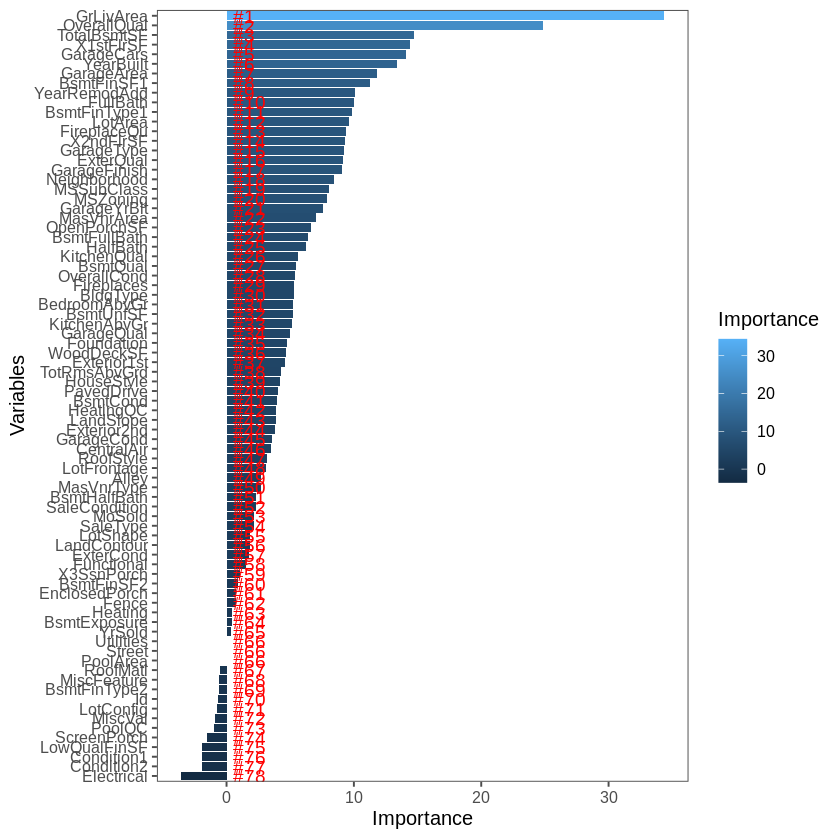

In [54]:
# Use ggplot2 to visualize the relative importance of variables
print("Plot of variable importance")
print("Variable importance of initial model")
ggplot(rankImportance, aes(x = reorder(Variables, Importance), 
                           y = Importance, fill = Importance)) +
  geom_bar(stat='identity') + 
  geom_text(aes(x = Variables, y = 0.5, label = Rank),
            hjust=0, vjust=0.55, size = 4, colour = 'red') +
  labs(x = 'Variables') +
  coord_flip() + 
  theme_few()

[1] 181962.4

[1] "Inital prediction"


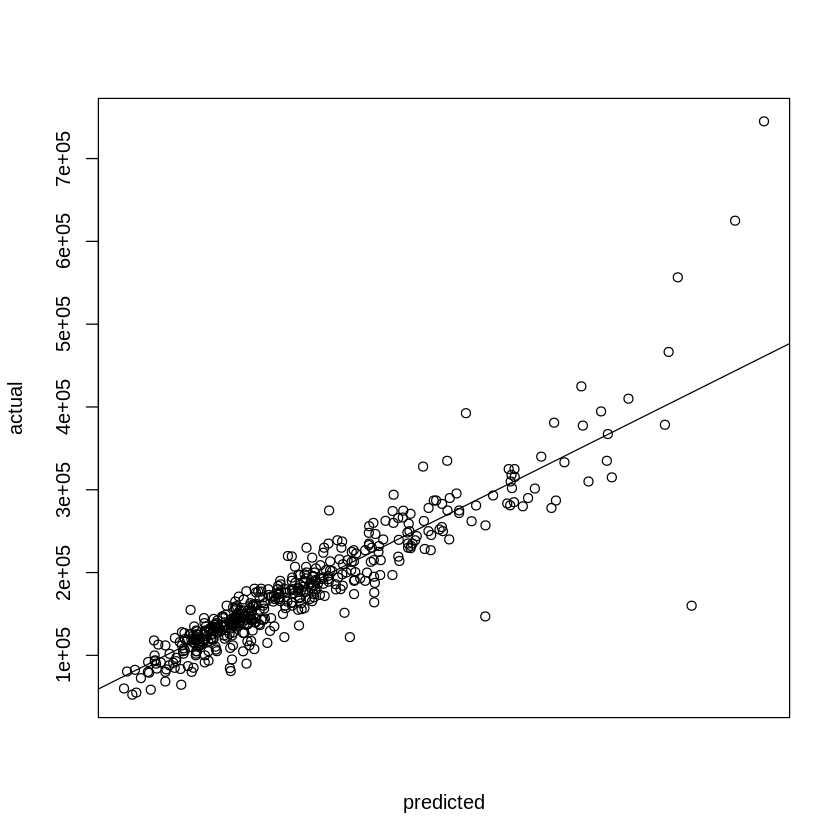

In [55]:
first_SSE <- mean((fitForest1-test$SalePrice)^2)
mean(train$SalePrice)
print("Inital prediction")
plot(fitForest1,test$SalePrice,
     xlab="predicted",ylab="actual", xaxt="n")
abline(a=0,b=1)

Mean of Sale Price in the training set is 181962.382.

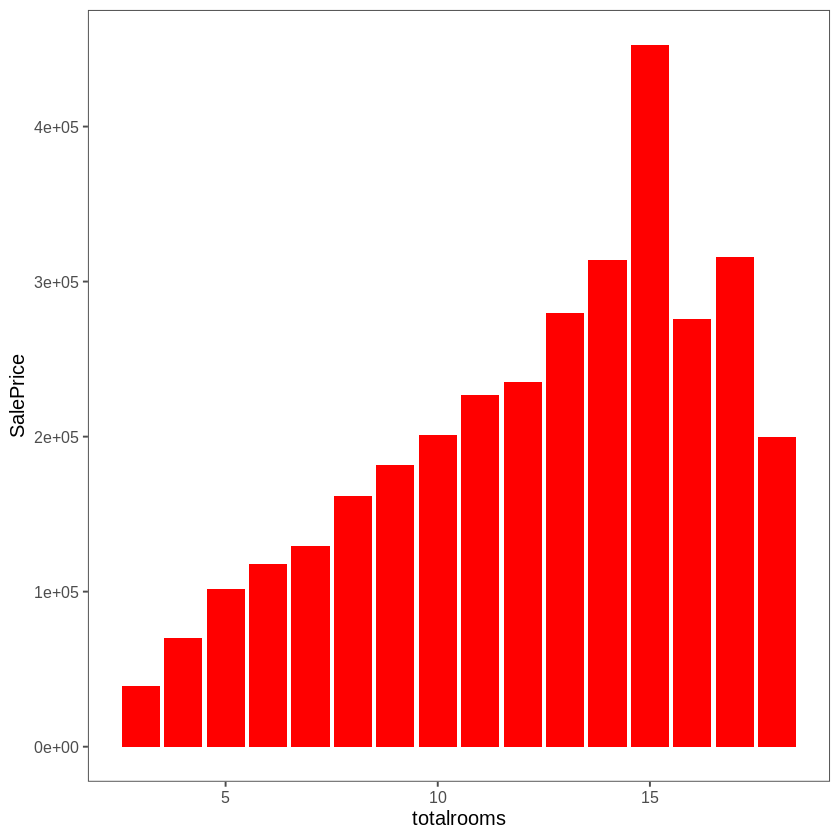

In [56]:
# Lets create a variable of total rooms
house_train$totalrooms <- house_train$TotRmsAbvGrd+house_train$FullBath+house_train$HalfBath+house_train$BsmtFullBath+house_train$BsmtHalfBath
ggplot(house_train, aes(x = totalrooms, y = SalePrice)) +
  stat_summary(fun.y = "mean", geom  = "bar", fill="red") +
  labs(x = 'totalrooms') +
  theme_few()

From this histogram we observe 15 total rooms has the highest sale price.

In [57]:
?boxplot()

In [58]:
summary(housing_random)

                Length Class  Mode     
call               4   -none- call     
type               1   -none- character
predicted       1000   -none- numeric  
mse              500   -none- numeric  
rsq              500   -none- numeric  
oob.times       1000   -none- numeric  
importance       160   -none- numeric  
importanceSD      80   -none- numeric  
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               1000   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [61]:
housing_random$mse[length(housing_random$mse)]

[1] 906615931

In [62]:
housing_random$mse[length(housing_random$mse)]
# take square root to calculate RMSE for the model
rmse_random_forest <- sqrt(housing_random$mse[length(housing_random$mse)])
cat("RMSE of Random Forest : ", rmse_random_forest)

[1] 906615931

RMSE of Random Forest :  30110.06